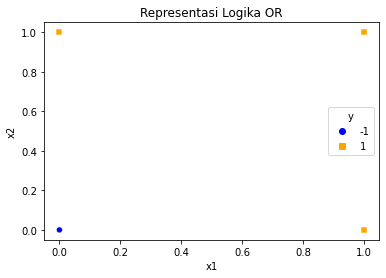

In [1]:
#Import library
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
%matplotlib inline

#Fungsi aktivasi (Jika x>=0 maka 1, jika x<0 maka -1)
def activationFunction (x):
    return np.where(x >= 0, 1, -1)

#Menggunakan tuple di dalam list untuk merepresentasikan tabel fungsi logika
dataTraining = [((1, 1), 1), ((1, 0), 1), ((0, 1), 1), ((0, 0), -1)]

#Simpan ke dalam single list untuk masing-masing nilai
x1 = [dataTraining[i][0][0] for i in range(4)]
x2 = [dataTraining[i][0][1] for i in range(4)]
y = [dataTraining[i][1] for i in range(4)]

#Buat dataframe dengan data dari list x1, x2, dan y
df = pd.DataFrame({'x1': x1,'x2': x2,'y': y})

#Visualisasi dengan menggunakan scatterplot
sns.scatterplot(x='x1', y='x2', data=df, hue='y', style='y', markers=["o", "s"], palette={1: 'orange', -1: 'blue'})
plt.title("Representasi Logika OR")
plt.show()



Rumus pertidaksamaan: 2.2034547054803895 * x1 + 2.9315353338392462 * x2 + -2.0 >= 0
Titik koordinat sumbu x1 adalah -2.9315353338392462 * 0 + -2.0 / 2.2034547054803895 = 0.6822363615794208
Titik koordinat sumbu x2 adalah -2.2034547054803895 * 0 + -2.0 / 2.9315353338392462 = 0.9076655830617435
Epoch:29


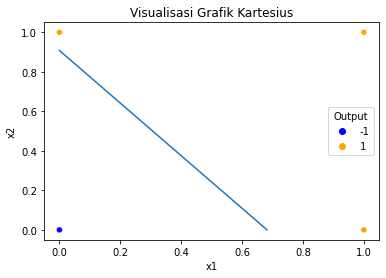

In [2]:
#Memberikan warna dan ketebalan pada hasil print
class Color:
    red = '\033[91m'
    green = '\033[92m'
    blue = '\033[94m'
    bold = '\033[1m'
    end = '\033[0m'

#Menentukan parameter untuk variabel yang dibutuhkan oleh algoritma perceptron
w = np.random.rand(2)
b = 0
errors = [] 
learningRate = .5
epoch = 30

#Looping algoritma perceptron learning
for i in range(epoch):
    for x, y in dataTraining:
        u = sum(x*w) + b
        
        error = y - activationFunction(u) 
      
        errors.append(error) 
        for index, value in enumerate(x):
            w[index] += learningRate * error * value
            b += learningRate*error

#Fungsi untuk menentukan sumbu x1 dan x2
def tipot_x1_x2(w, b):
    x1 = -(w[0]*0 + b) / w[1]  #Set x2 = 0 and solve for x1
    x2 = -(w[1]*0 + b) / w[0]  #Set x1 = 0 and solve for x2
    return x1, x2
x1, x2 = tipot_x1_x2(w, b)

#Menunjukkan hasil rumus pertidaksamaan dan nilai x1, x2
print(f"Rumus pertidaksamaan: {Color.bold}{Color.blue}{w[0]} * x1 + {w[1]} * x2 + {b} >= 0{Color.end}")
print(f"Titik koordinat sumbu x1 adalah {Color.bold}-{w[1]} * 0 + {b} / {w[0]} = {Color.bold}{Color.red}{x1}{Color.end}")
print(f"Titik koordinat sumbu x2 adalah {Color.bold}-{w[0]} * 0 + {b} / {w[1]} = {Color.bold}{Color.red}{x2}{Color.end}")
print(f"Epoch:{i}")

#Menentukan pembatas prediksi antara output bipolar -1 dan 1
a = [0,-b/w[1]]
c = [-b/w[0],0]
plt.figure(1)
sns.scatterplot(x='x1', y='x2', data=df, hue='y',  markers=["o", "s"], palette={1: 'orange', -1: 'blue'})
plt.legend(title="Output")
plt.title('Visualisasi Grafik Kartesius')
plt.plot(a,c)
plt.show()

In [ ]:
#Hasil Training
ask = "y"

#Loop selama ask = y or Y
while (ask == "y" or ask == "Y"):
    #Memasukkan angka x1 dan x2
    x1 = int(input("Data x1: "))
    x2 = int(input("Data x2: "))
    
    #Simpan ke dalam variabel dataInput dari hasil input x1 dan x2
    dataInput = (x1,x2)
    print(f"{Color.bold}===Hasil Training==={Color.end}")
    print("Data yang diinput x1 dan x2 secara berurutan dalam (x1,x2):", dataInput)

    #Buat pertidaksamaan
    equation = w[0]*x1 + w[1]*x2 + b
    print(f"{Color.bold}===Diketahui==={Color.end}")
    print(f"w1: {w[0]}")
    print(f"w2: {w[1]}")
    print(f"w0: {b}")
    
    #Ditanya -1 atau 1
    print(f"{Color.bold}===Ditanya==={Color.end}")
    print("-1 atau 1?")
    
    #Menentukan rumus pertidaksamaan dan hasilnya apabila nilai x1 dan x2 dimasukkan ke dalam pertidaksamaan
    print(f"{Color.bold}===Jawaban==={Color.end}")
    print(f"Rumus pertidaksamaan: {w[0]} * {x1} + {w[1]} * {x2} + {b}")
    print(f"Output pertidaksamaan: {equation}")
    
    #Menggolongkan hasil pertidaksamaan dengan fungsi aktivasi
    print(f"{Color.bold}===Penggolongan dengan Fungsi Aktivasi==={Color.end}")
    print("Output Hasil Training:", activationFunction(equation))
    if (equation >= 0):
        print(f"Alasan: nilai {equation} lebih besar sama dengan dari 0")
    else:
        print(f"Alasan: nilai {equation} lebih kecil dari 0")
    print("\n")
    
    ask = input("Apakah ingin input angka lagi?(y/n) ")
    print("\n")

In [ ]:
#Membandingkan hasil perceptron neural network dengan output tabel fungsi logika
dfCompare = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y, 'output_activation': output_activation})
print(df)

In [ ]:
plt.figure(2)
plt.ylim([-1,1]) 
plt.plot(errors)